# **Netflix**

<img src="https://media.giphy.com/media/UoRR2d1b8xs04A2bV8/giphy.gif" width="480" height="480">

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from collections import Counter

# Загрузка данных

Распаковываем архив.

In [2]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: netflix_titles.csv      


Загружаем данные из CSV файла ***'netflix_titiles.csv'*** в переменную ***'netfix'***. И выводим первые пять строк для ознокомления с данными и их структурой.

In [3]:
netflix = pd.read_csv("netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Как можно заметить, в данных есть **12** признаков.

Выведем общую информацию.

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Заметим, в данных имеются пропуски в таких признаках, как:

- ***director (режиссер)***
- ***cast (актерский состав)***
- ***country (страна)***
- ***date_added (дата добавления)***
- ***rating (рейтинг)***
- ***duration (продолжительность)***

# Разделение на сериалы и фильмы

Для дальнейшего анализа и более наглядного понимания данных, проведем разделение между сериалами и фильмами, создав отдельные признаки для каждой из этих категорий.

In [5]:
netflix_shows = netflix.loc[netflix['type'] == 'TV Show'].copy()
netflix_movies = netflix.loc[netflix['type'] == 'Movie'].copy()

Визуализируем распределение фильмов и сериалов на платформе Netflix с помощью наглядного графика.  


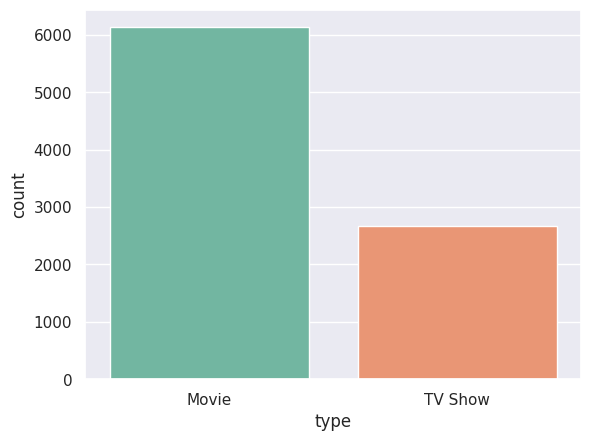

In [6]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix, palette='Set2')

Из графика можем наблюдать соотношение между фильмами и сериалами на платформе Netflix. Очевидно, что количество фильмов значительно превышает количество сериалов, что может указывать на тенденцию к большему представлению фильмов на платформе.

# Время длительности

Создадим переменную ***'duration'***, в которой сохраним длительность фильмов и сериалов, а также количество элементов в каждой из этих категорий.

In [7]:
duration = pd.value_counts(netflix['duration'])
duration

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

Используем **graph_objects** из библиотеки Plotly для визуализации продолжительности фильмов и сериалов на Netflix.

In [11]:
fig = go.Figure([go.Bar(x=duration.index, y=duration.values, text=duration.values, marker_color='red')])

fig.update_traces(texttemplate='%{text::2s}', textposition='outside')
fig.show()

Заметим, что большое количество продолжительности приходится на 1, 2 и 3 сезоны, так как сериалы обычно имеют такую структуру. В то время как фильмы имеют широкий диапазон продолжительности, охватывая все от короткометражных произведений до полноценных кинематографических эпосов.

# Популярный месяц

Как упоминалось ранее, признак ***'date_added'*** содержит *10* пропущенных значений.

In [12]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Поскольку всего *10* пропущенных значений в признаке ***'date_added'*** составляют ничтожную долю от общего объема данных, безопасно будет удалить эти значения. Это позволит более точно анализировать и интерпретировать остальные данные, не беспокоясь о влиянии незначительных пропусков.

In [13]:
netflix_date = netflix[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [14]:
netflix_date.head()

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"


Улучшим анализ данных, разделив признак ***'date_added'*** на два новых признака: ***'year' (год)*** и ***'month' (месяц)***

In [15]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
0,"September 25, 2021",2021,September
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September


Проведем сортировку дат добавления контента по годам и месяцам. Это позволит нам увидеть эволюцию контента на платформе со временем.

In [16]:
netflix_date.sort_values(by=['year', 'month'])

,date_added,year,month
6611,"February 4, 2008",2008,February
5957,"January 1, 2008",2008,January
5956,"May 5, 2009",2009,May
5955,"November 18, 2009",2009,November
7370,"November 1, 2010",2010,November
...,...,...,...
178,"September 1, 2021",2021,September
179,"September 1, 2021",2021,September
180,"September 1, 2021",2021,September
181,"September 1, 2021",2021,September


Заметим, что первый фильм или сериал был добавлен в январе **2008** года, а последний – в сентябре **2021** году.

Давайте рассмотрим количество фильмов и сериалов, выложенных по месяцам в разные годы.

In [17]:
month_order = netflix_date['month'].unique()
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

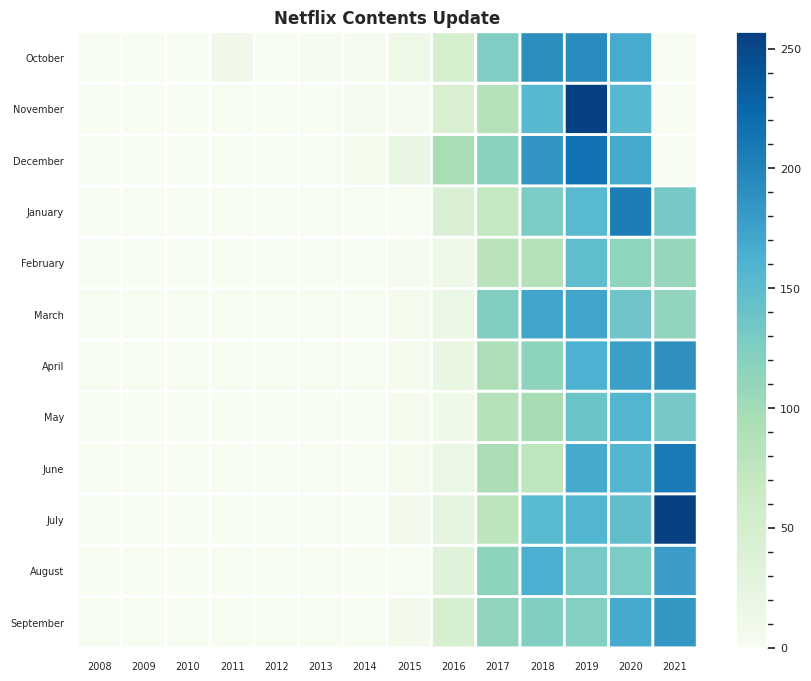

In [18]:
plt.figure(figsize=(10, 8))
plt.pcolor(df, cmap='GnBu', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

Можно заметить, что до **2016** года активность на платформе была невысокой. Самыми популярными месяцами для добавления контента оказались месяцы, **совпадающие с каникулами**.  
Этот указывает на стремление платформы привлекать внимание аудитории в периоды повышенного интереса, таких как **школьные и университетские каникулы**.

# Рейтинги

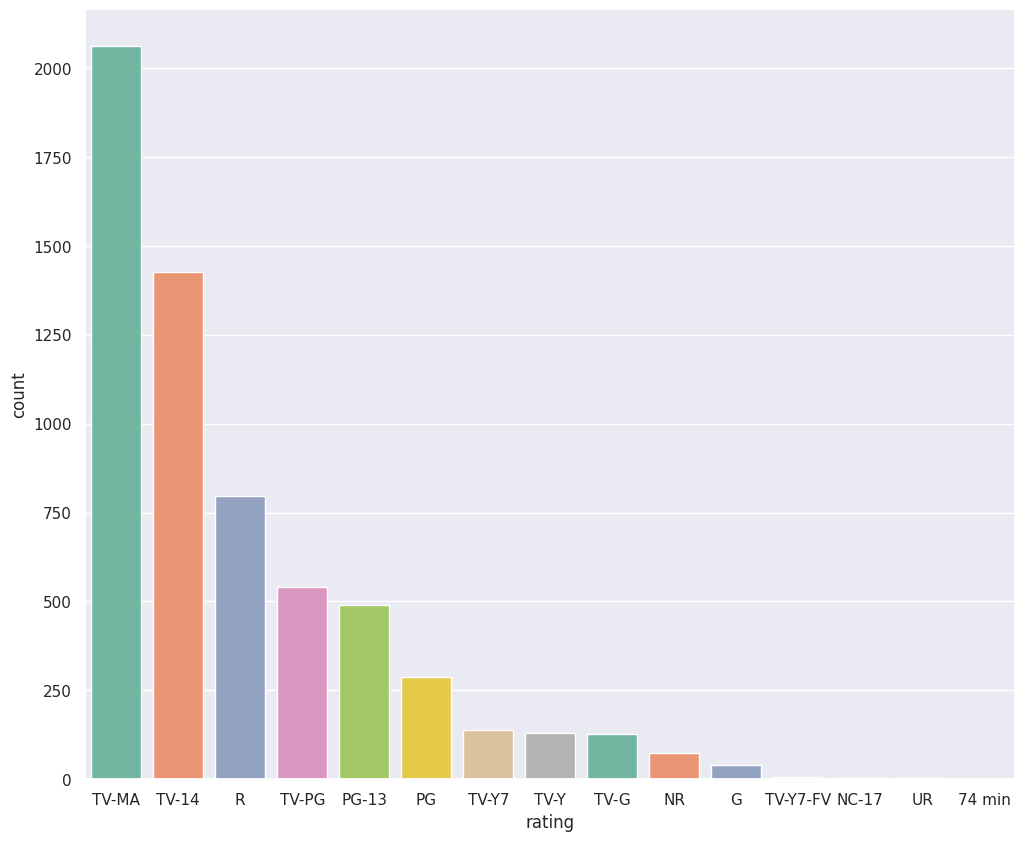

In [19]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

Наиболее популярными рейтингами контента на Netflix оказались **TV-MA, TV-14 и R**. Это указывает на значительный интерес зрителей к материалам, ориентированным на взрослую аудиторию и подростков.

# Год выпуска фильмов

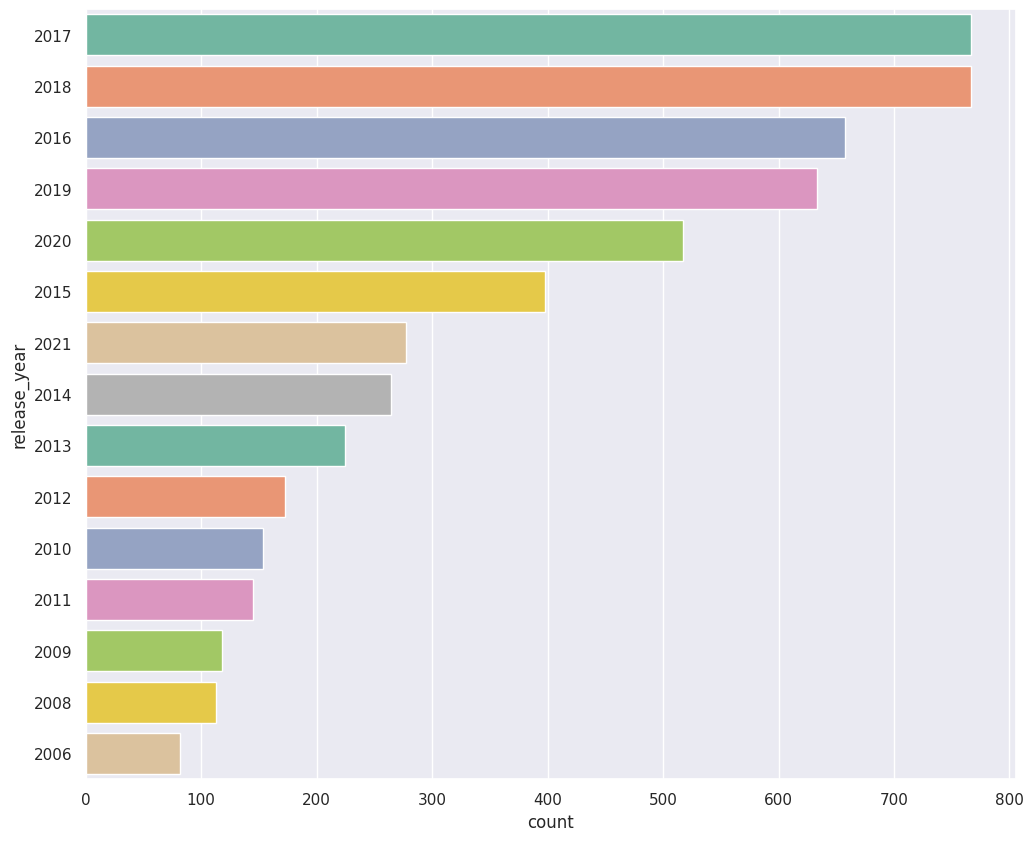

In [20]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

В **2017** и **2018** выходило больше всего фильмо/сериалов.

# Фильмы

## Топ 10 стран

Как отмечено ранее, в признаке ***'country'*** было обнаружено *440* пропущенных значений.

In [21]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

Для того чтобы учесть *440* пропущенных значений в признаке ***'country'***, заполним эти пропуски значением ***'Unknown'***. Это позволит сохранить эти записи в анализе и обозначить их как неизвестные по странам происхождения фильмов.

In [22]:
netflix_movies['country'].fillna('Unknown', inplace=True)
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

Проанализируем, сколько различных стран были исчислены как производители фильмов на платформе Netflix

In [23]:
netflix_movies['country'].value_counts()

United States                            2058
India                                     893
Unknown                                   440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

Взглянув на данные, заметим что существует ряд фильмов, совместно созданных несколькими странами.  
В связи с этим, можем построить словарь, который будет отображать страны в качестве ключей, а значение каждой страны будет представлено числом фильмов, произведенных в этой стране. Это позволит лучше понять, какие страны активно участвуют в создании контента.

In [24]:
countries_mov = {}

cou = list(netflix_movies['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))

    for j in i:
        if j in list(countries_mov.keys()):
            countries_mov[j]+=1
        else:
            countries_mov[j]=1

In [25]:
for key, value in list(countries_mov.items())[:10]:
  print(key, '->', value)

UnitedStates -> 2752
Unknown -> 440
Ghana -> 5
BurkinaFaso -> 1
UnitedKingdom -> 534
Germany -> 182
Ethiopia -> 1
CzechRepublic -> 16
India -> 962
France -> 303


Отсортируем по значениям и возьмем топ *10*.

In [26]:
top_countries = sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse=True)
top_countries = top_countries[:10]
top_countries

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

In [27]:
names = [name for name, _ in top_countries]
values = [value for _, value in top_countries]

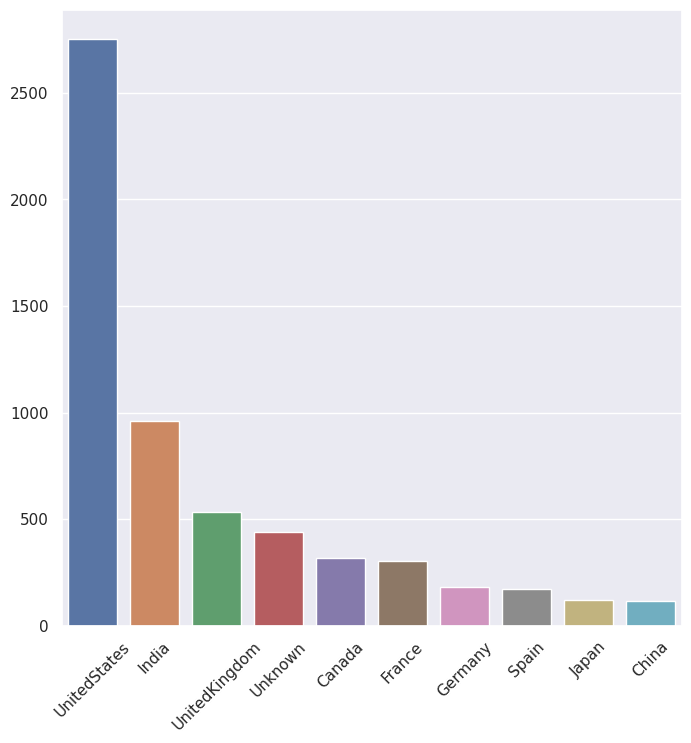

In [28]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)
ax.set_xticklabels(names, rotation=45);

Заметно, что наибольшее количество фильмов выпущено странами: ***США, Индия и Великобритания***. При этом ***США*** значительно опережает остальные страны по числу выпущенных фильмов.

## Продолжительности фильмов

Как упомянуто ранее, признак ***'duration'*** содержит *3* пропущенных значения. Для того чтобы обеспечить чистоту данных и устранить возможные искажения, связанные с этими пропусками, удалим записи, содержащие эти пропущенные значения.

In [29]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [30]:
netflix_movies = netflix_movies.dropna(subset=['duration'])

Для улучшения удобства анализа и визуализации данных применим процесс преобразования категориальных признаков в числовые.

In [31]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration'] = netflix_movies['duration'].astype(int)
netflix_movies['duration'][:10]

0      90
6      91
7     125
9     104
12    127
13     91
16     67
18     94
22    161
23     61
Name: duration, dtype: int64

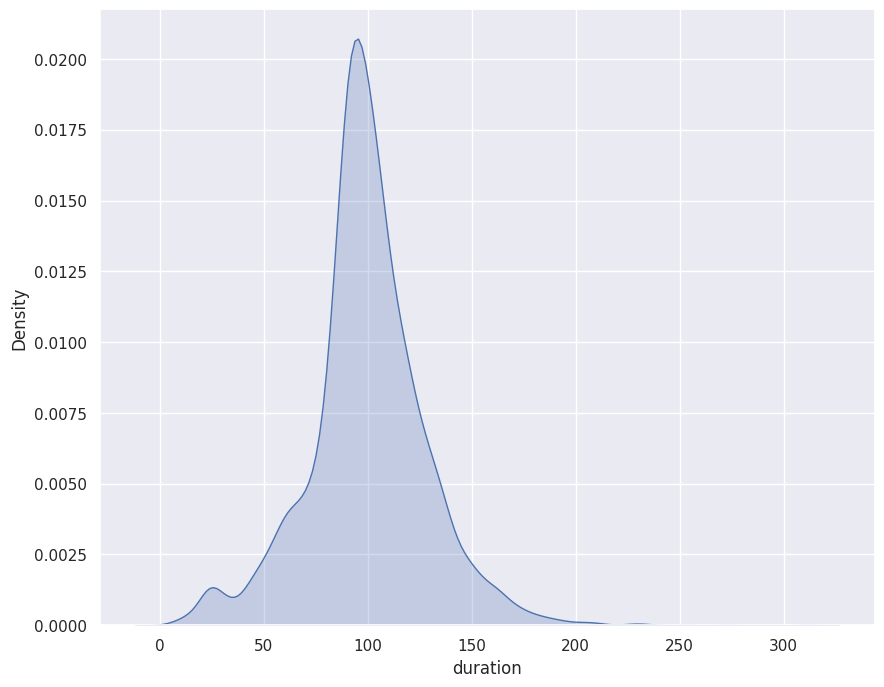

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.kdeplot(data=netflix_movies['duration'], fill=True);

Можно заметить, что наиболее распространенные продолжительности фильмов сосредоточены в диапазоне ***от 60 до 120 минут***.   
Этот промежуток охватывает большинство фильмов на платформе Netflix, подчеркивая предпочтения зрителей к кинематографическим работам средней продолжительности.   
Важно отметить, что помимо этого диапазона также присутствует значительное количество ***короткометражных фильмов***.

## Жанры

Рассмотрим жанры фильмов на платформе Netflix.

In [33]:
netflix_movies['listed_in']

0                                          Documentaries
6                               Children & Family Movies
7       Dramas, Independent Movies, International Movies
9                                       Comedies, Dramas
12                          Dramas, International Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6128, dtype: object

Как можем заметить, один фильм может включать в себя несколько жанров. Для более полного анализа создадим словарь, в котором будут храниться все уникальные жанры вместе с количеством раз, которое они встречаются.

In [34]:
genres_list = list(netflix_movies['listed_in'])
genres_array = []

for i in genres_list:
    i = list(i.split(','))
    for j in i:
        genres_array.append(j.replace(' ', ''))

genres = Counter(genres_array)

In [35]:
for key, value in list(genres.items())[:10]:
  print(key, '->', value)

Documentaries -> 869
Children&FamilyMovies -> 641
Dramas -> 2427
IndependentMovies -> 756
InternationalMovies -> 2752
Comedies -> 1674
Thrillers -> 577
RomanticMovies -> 616
Music&Musicals -> 375
HorrorMovies -> 357


Отсортируем наш словарь с жанрами по количеству встречаемости и затем визуализируем топ *10* самых популярных жанров на платформе Netflix.

In [36]:
genres = sorted(genres.items(), key=lambda item: genres[item[0]], reverse=True)
genres[:10]

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('Thrillers', 577),
 ('Music&Musicals', 375)]

In [37]:
genre_names = [name for name, value in genres]
genre_values = [value for name, value in genres]

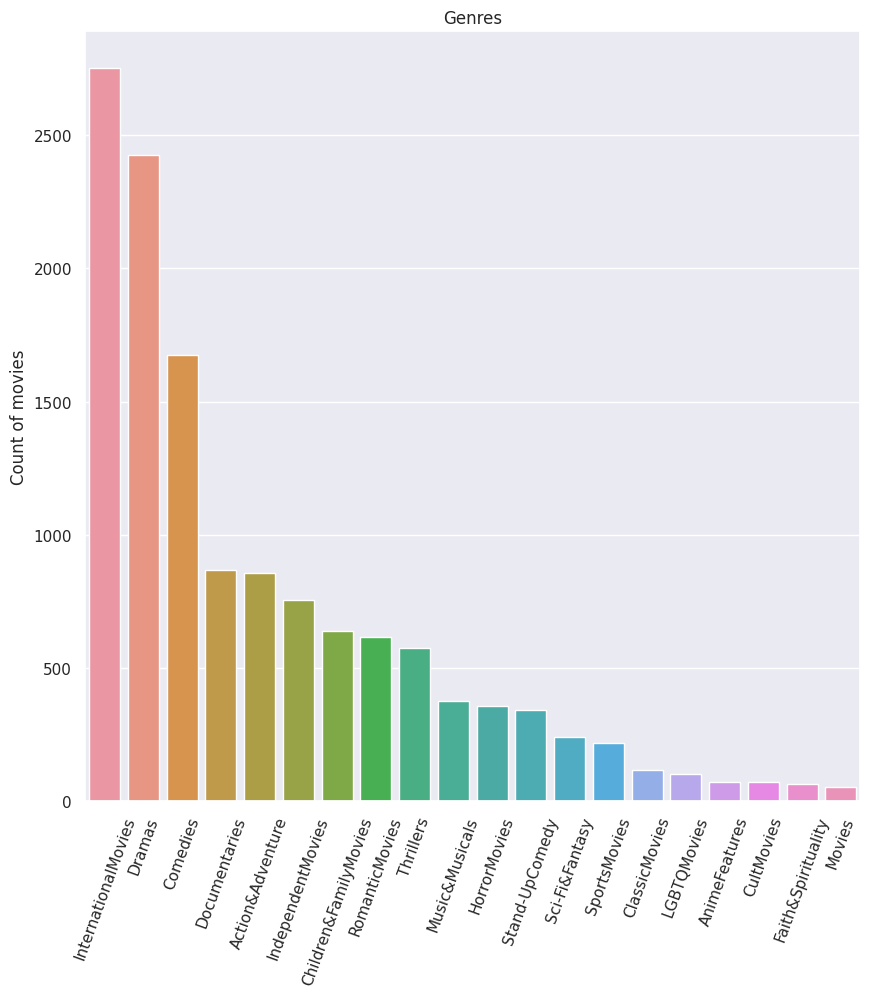

In [38]:
fig = plt.figure(figsize = (10, 10))
ax = sns.barplot(x=genre_names, y=genre_values)

ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel("Count of movies")
ax.set_title("Genres");

На платформе Netflix выделяются три наиболее популярных жанра: ***'InternationalMovies', 'Dramas' и 'Comedies'***. Фильмы этих жанров преобладают среди контента, представленного на платформе

# Сериалы

## Топ 10 стран

Как отмечено ранее, в признаке ***'country'*** было обнаружено *391* пропущенных значений.

In [39]:
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

Для того чтобы учесть *391* пропущенных значений в признаке ***'country'***, заполним эти пропуски значением ***'Unknown'***. Это позволит сохранить эти записи в анализе и обозначить их как неизвестные по странам происхождения фильмов.

In [40]:
netflix_shows['country'].fillna('Unknown', inplace=True)
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country            0
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

Проанализируем, сколько различных стран были исчислены как производители сериалов на платформе Netflix

In [41]:
netflix_shows['country'].value_counts()

United States                                    760
Unknown                                          391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

Взглянув на данные, заметим что существует ряд сериалов, совместно созданных несколькими странами. В связи с этим, можем построить словарь, который будет отображать страны в качестве ключей, а значение каждой страны будет представлено числом сериалов, произведенных в этой стране. Это позволит лучше понять, какие страны активно участвуют в создании контента.

In [42]:
countries_show = {}

cou = list(netflix_shows['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))

    for j in i:
        if j in list(countries_show.keys()):
            countries_show[j]+=1
        else:
            countries_show[j]=1

In [43]:
for key, value in list(countries_show.items())[:10]:
  print(key, '->', value)

SouthAfrica -> 11
Unknown -> 391
India -> 84
UnitedKingdom -> 272
UnitedStates -> 938
Mexico -> 58
Turkey -> 30
Australia -> 66
Finland -> 4
Nigeria -> 9


Отсортируем по значениям и возьмем топ *10*.

In [44]:
top_countries = sorted(countries_show.items(), key=lambda item: countries_show[item[0]], reverse=True)
top_countries = top_countries[:10]
top_countries

[('UnitedStates', 938),
 ('Unknown', 391),
 ('UnitedKingdom', 272),
 ('Japan', 199),
 ('SouthKorea', 170),
 ('Canada', 126),
 ('France', 90),
 ('India', 84),
 ('Taiwan', 70),
 ('Australia', 66)]

In [45]:
names = [name for name, _ in top_countries]
values = [value for _, value in top_countries]

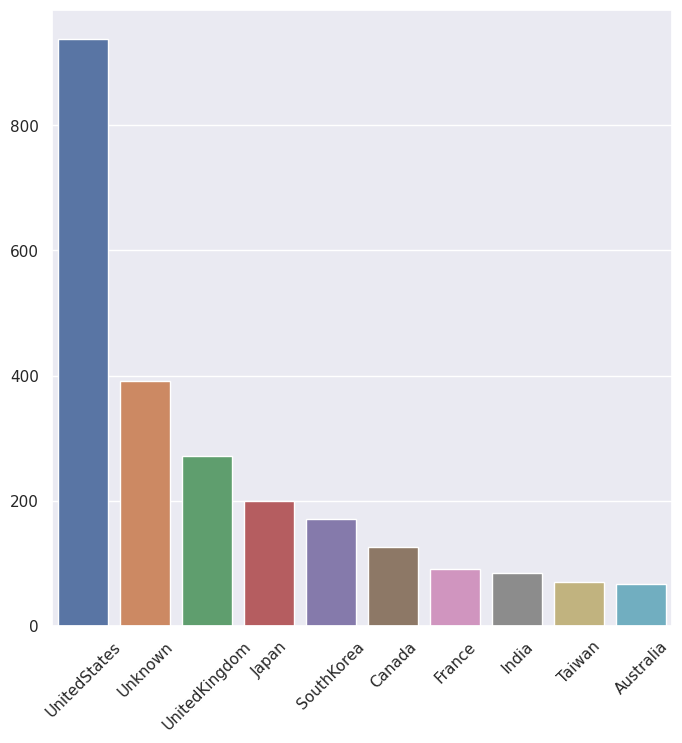

In [46]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)
ax.set_xticklabels(names, rotation=45);

Заметно, что наибольшее количество сериалов выпущено странами: ***США, Великобритания***, а также есть значительное количество сериалов, ***происхождение которых остается неизвестным***. При этом ***США*** значительно опережает остальные страны по числу выпущенных фильмов.

## Сезоны

С учетом того, что длительности сериалов на платформе Netflix обычно обозначаются в сезонах, можем провести преобразование для удаления слова ***'seasons'*** и преобразования этих значений в числовые переменные. Это позволит более легко анализировать и сравнивать продолжительности сериалов, не имея необходимости обращать внимание на текстовое обозначение.

In [50]:
durations = netflix_shows[['title', 'duration']]
durations

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [51]:
durations['no_of_seasons'] = durations['duration'].str.replace(' Season','').str.replace('s', '').astype(int)
durations.drop('duration', axis=1, inplace=True)
durations

<ipython-input-51-000a37958dee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-000a37958dee>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,no_of_seasons
1,Blood & Water,2
2,Ganglands,1
3,Jailbirds New Orleans,1
4,Kota Factory,2
5,Midnight Mass,1
...,...,...
8795,Yu-Gi-Oh! Arc-V,2
8796,Yunus Emre,2
8797,Zak Storm,3
8800,Zindagi Gulzar Hai,1


### Сериалы с большим количеством сезонов

Выведем топ *20* самых долгих сериалов на платформе Netflix по количеству сезонов.

In [52]:
top = durations.copy()
top = top.sort_values(by='no_of_seasons', ascending=False)

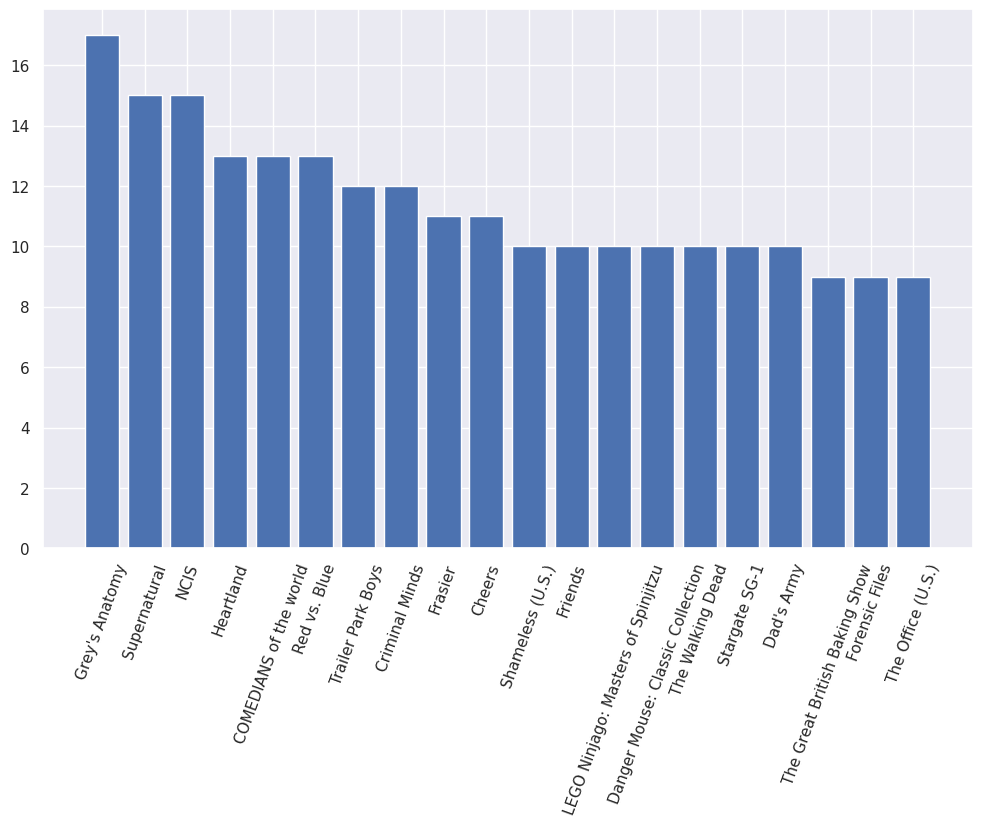

In [53]:
top20 = top[0:20]
plt.figure(figsize=(12, 7))

plt.bar(top20['title'], top20['no_of_seasons'])
plt.xticks(top20['title'], rotation=70);

По анализу данных видно, что среди самых долгих сериалов на платформе Netflix выделяются такие популярные названия, как ***'Grey's Anatomy', 'Supernatural' и 'NCIS'***. Их продолжительность в сезонах говорит о широкой популярности и долгоживущей аудитории. Такое большое количество сезонов указывает на стабильный успех и продолжительный интерес зрителей к этим сериалам, делая их заметными и значимыми произведениями на платформе.

### Сериалы с наименьшим количеством сезонов

Посмотрим на самые недолгие сериалы на платформе Netflix по количеству сезонов

In [54]:
bottom = top.sort_values(by='no_of_seasons')
bottom = bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(
    data=[
          go.Table(header=dict(values=['Title', 'No of seasons']),
                   cells=dict(values=[bottom['title'], bottom['no_of_seasons']]))
          ]
)
fig.show()

Взглянув на данные, можно заметить, что самые недолгие сериалы на платформе Netflix имеют всего ***1 сезон***. Это может быть результатом разных факторов: некоторые сериалы могли не найти аудиторию и были закрыты после первого сезона, в то время как другие могли быть запланированы как мини-сериалы с одним сезоном с завершенной историей.

### Продолжительность сериалов

Визуализируем продолжительности сериалов на платформе Netflix, чтобы лучше понять распределение количества сезонов

In [55]:
durations

,title,no_of_seasons
1,Blood & Water,2
2,Ganglands,1
3,Jailbirds New Orleans,1
4,Kota Factory,2
5,Midnight Mass,1
...,...,...
8795,Yu-Gi-Oh! Arc-V,2
8796,Yunus Emre,2
8797,Zak Storm,3
8800,Zindagi Gulzar Hai,1


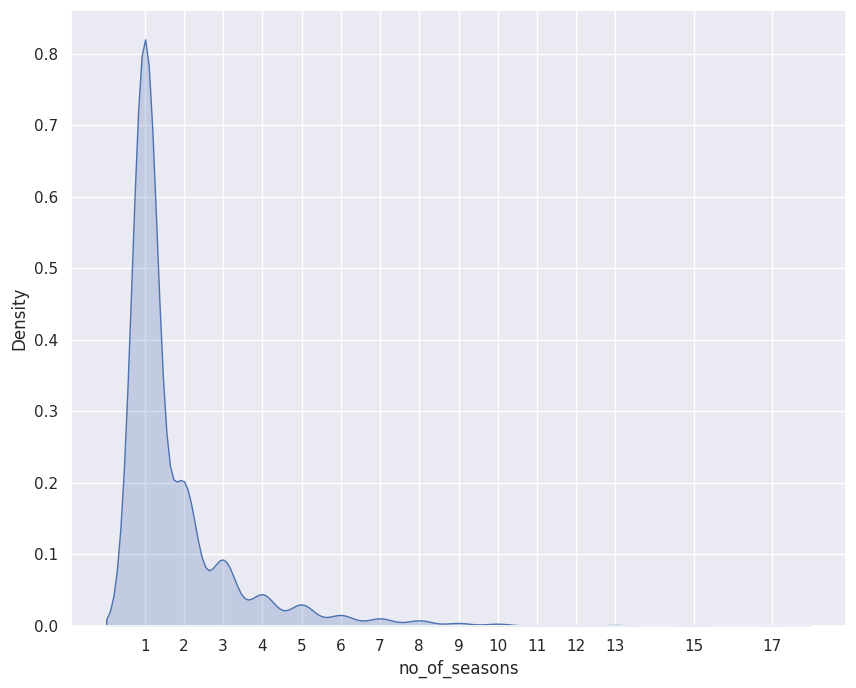

In [56]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.kdeplot(data=durations['no_of_seasons'], fill=True)
plt.xticks(sorted(durations['no_of_seasons'].unique()));

Действительно множество сериалов имеют только ***1 сезон***, и при этом сравнительно мало сериалов с ***более чем 3 сезонами***.

## Жанры

Рассмотрим жанры сериалов на платформе Netflix.

In [57]:
netflix_shows['listed_in']

1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
5                      TV Dramas, TV Horror, TV Mysteries
                              ...                        
8795                               Anime Series, Kids' TV
8796                    International TV Shows, TV Dramas
8797                                             Kids' TV
8800    International TV Shows, Romantic TV Shows, TV ...
8803               Kids' TV, Korean TV Shows, TV Comedies
Name: listed_in, Length: 2676, dtype: object

Заметим, что один сериал может включать в себя несколько жанров. Для более полного анализа создадим словарь, в котором будут храниться все уникальные жанры вместе с количеством раз, которое они встречаются.

In [58]:
genres_list = list(netflix_shows['listed_in'])
genres_array = []

for i in genres_list:
    i = list(i.split(','))
    for j in i:
        genres_array.append(j.replace(' ', ''))

genres = Counter(genres_array)

Отсортируем наш словарь с жанрами по количеству встречаемости и затем визуализируем топ *10* самых популярных жанров на платформе Netflix. Это позволит нам наглядно увидеть, какие жанры наиболее востребованы среди аудитории.

In [59]:
genres = sorted(genres.items(), key=lambda item: genres[item[0]], reverse=True)
genres[:10]

[('InternationalTVShows', 1351),
 ('TVDramas', 763),
 ('TVComedies', 581),
 ('CrimeTVShows', 470),
 ("Kids'TV", 451),
 ('Docuseries', 395),
 ('RomanticTVShows', 370),
 ('RealityTV', 255),
 ('BritishTVShows', 253),
 ('AnimeSeries', 176)]

In [60]:
genre_names = [name for name, _ in genres]
genre_values = [value for _, value in genres]

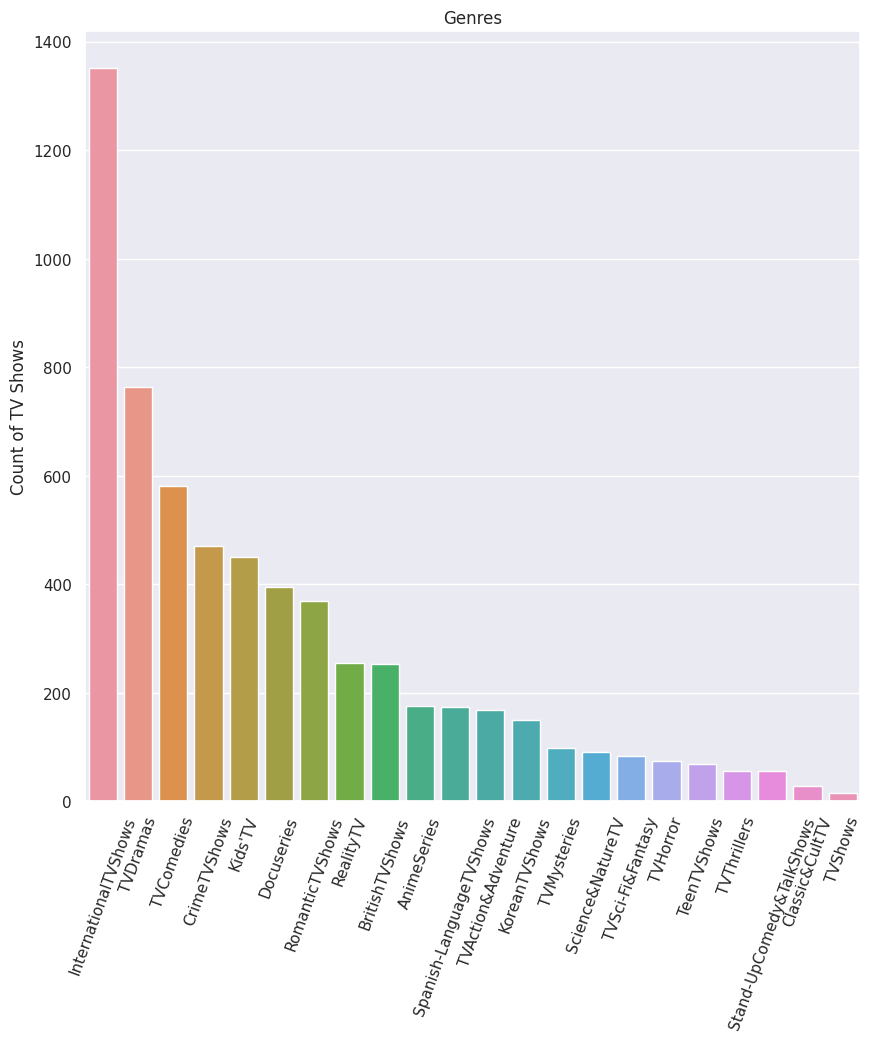

In [61]:
fig = plt.figure(figsize = (10, 10))
ax = sns.barplot(x=genre_names, y=genre_values)

ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel("Count of TV Shows")
ax.set_title("Genres");

На платформе Netflix выделяются три наиболее популярных жанра: ***'InternationalTVShows', 'TVDramas' и 'TVComedies'***. Сериалы этих жанров преобладают среди контента, представленного на платформе

# Система рекомендаций

С помощью статистической меры **TF-IDF** (*Term Frequency-Inverse Document Frequency*) можем оценить важность каждого слова в контексте текстовой коллекции. Эта методика позволяет выделить ключевые слова и фразы, которые наиболее характерны и информативны для каждого документа.  
Первая часть меры, **TF** (*term frequency — частота слова*), измеряет, насколько часто определенное слово встречается внутри конкретного документа. Вычисляем отношение числа вхождений данного слова к общему числу слов в документе. Это позволяет определить важность слова в пределах отдельного текста.  
**TF** считается как:  
  
$
  tf(t,d)=\frac{(n_t)}{\sum_k(n_k)},
$   
  
где $n_t$ есть число вхождений слова t в документ, а в знаменателе — общее число слов в данном документе.   
Вторая часть, **IDF** (*inverse document frequency — обратная частота документа*), учитывает, насколько редко или часто данное слово встречается во всей коллекции документов. Это позволяет снизить вес общих и широкоупотребительных слов, делая более акцентированными слова, которые характерны для конкретных документов.    
**IDF** считается как:  
  
$
idf(t,D) = log(\frac{|D|}{{d_i\in D | t \in d_i}}),
$
   
где
- |D| - число документов в коллекции;
- $d_i\in D | t \in d_i$ - число документов из коллекции D D, в которых встречается $n_{t} \neq 0$.

Итоговая мера **TF-IDF** получается путем перемножения **TF** и **IDF** для каждого слова в каждом документе. Это дает нам числовую оценку важности слова, которую можно использовать для анализа и классификации текстовой информации.
  
$
tf-idf(t,d,D) = tf(t,d) \times idf(t,D)
$
  

Для использования метода TF-IDF необходимо импортировать инструмент, который позволит провести этот анализ. Для этой цели будем использовать TfidfVectorizer из библиотеки sklearn. Этот инструмент позволит эффективно преобразовать текстовые данные в числовые значения, основанные на мере TF-IDF.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
netflix['description']

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

In [87]:
netflix['description'].isna().sum()

0

In [88]:
netflix['description'].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

Для обработки английских текстов воспользуемся стоп-словами из английского языка. Они представляют собой слова, которые обычно не несут смысловой нагрузки и могут быть исключены из анализа.   
Затем, используя ***TfidfVectorizer*** и обучив его на описаниях к фильмам и сериалам, сможем создать числовое представление текстов, учитывающее их важность в контексте всей коллекции

In [89]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix['description'])

tfidf_matrix.shape

(8807, 18895)

После обработки и векторизации описаний к фильмам с использованием ***TfidfVectorizer*** было получено общее количество *18,895* уникальных слов, которые описывают *8,807* фильмов и сериалов на платформе Netflix.

In [90]:
pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf.get_feature_names_out())

,000,007,009,10,100,1000,102,108,10th,11,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Используя понятие косинусного сходства, мы можем измерить степень схожести между различными фильмами на основе их векторных представлений. Для этого мы вычисляем косинус угла между векторами признаков фильмов A и B.

Если у нас есть два вектора A и B с признаками, то косинусное сходство $cos(θ)$ вычисляется как отношение скалярного произведения векторов к произведению их норм:  
  
$
similarity = cos(θ) = \frac{A*B}{||A||||B||} = \frac{\sum_{i=1}^n A_i \times B_i}{\sqrt{\sum_{i=1}^n (A_i)^2} \times \sqrt{\sum_{i=1}^n (B_i)^2} }
$
    
Эта мера позволяет оценить, насколько близки между собой векторные представления фильмов A и B. Чем ближе значение косинусного сходства к *1*, тем более схожими являются фильмы, и наоборот, чем ближе к *0*, тем более разными они являются в контексте используемых признаков.

In [91]:
from sklearn.metrics.pairwise import cosine_similarity

cosine = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01538292,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02230089],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01538292, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02230089, ..., 0.        , 0.        ,
        1.        ]])

In [92]:
cosine.shape

(8807, 8807)

In [94]:
indexes = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()
indexes

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [95]:
cosine_df = pd.DataFrame(cosine)

cosine_df.columns = indexes.index

cosine_df['title'] = indexes.index
cosine_df = cosine_df.set_index('title')

cosine_df

title,Dick Johnson Is Dead,Blood & Water,Ganglands,Jailbirds New Orleans,Kota Factory,Midnight Mass,My Little Pony: A New Generation,Sankofa,The Great British Baking Show,The Starling,...,Zak Storm,Zed Plus,Zenda,Zindagi Gulzar Hai,Zinzana,Zodiac,Zombie Dumb,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,1.000000,0.000,0.000000,0.000000,0.015222,0.000000,0.00000,0.000000,0.040165,0.017411,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.015383,0.000000
Blood & Water,0.000000,1.000,0.000000,0.000000,0.000000,0.031227,0.05166,0.000000,0.000000,0.000000,...,0.035331,0.032784,0.116936,0.000000,0.032609,0.000000,0.042,0.000000,0.000000,0.000000
Ganglands,0.000000,0.000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.022301
Jailbirds New Orleans,0.000000,0.000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.016386,0.000000
Kota Factory,0.015222,0.000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.016718,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.035196,0.068784,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.045875,0.052108,0.000000,0.000000,1.000000,0.000,0.060511,0.000000,0.000000
Zombie Dumb,0.000000,0.042,0.000000,0.000000,0.000000,0.054920,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.037161,0.000000,0.000000,0.036964,0.000000,1.000,0.000000,0.000000,0.000000
Zombieland,0.000000,0.000,0.000000,0.000000,0.035196,0.000000,0.00000,0.000000,0.000000,0.062320,...,0.000000,0.000000,0.000000,0.042132,0.000000,0.060511,0.000,1.000000,0.000000,0.000000


Для создания системы рекомендаций на основе косинусной схожести разработаем функцию, которая будет оценивать степень схожести между фильмами и сериалами на основе их векторных представлений. Затем сможем использовать эту функцию для получения списка наиболее похожих фильмов на заданный, а затем выведем топ *10* наиболее похожих.

In [107]:
def get_recommendations(title, cosine_sim=cosine_df):
    idx = indexes[title]
    sim_scores = list(enumerate(cosine_df.loc[title]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indexes = [i[0] for i in sim_scores]

    return netflix['title'].iloc[movie_indexes]

Получим описание для фильма ***'My Little Pony: A New Generation'***. Это позволит  лучше понять сюжет и контекст этого фильма.

In [103]:
netflix[netflix['title'] == 'My Little Pony: A New Generation'].description.iloc[0]

"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it."

Получим рекомендации для фильма ***'My Little Pony: A New Generation'*** на основе его схожести с другими фильмами или сериалами на платформе Netflix.

In [108]:
get_recommendations('My Little Pony: A New Generation')

5237             Equestria Girls: Tales of Canterlot High
4364    My Little Pony Friendship Is Magic: Best Gift ...
4588                                      My Friend Pinto
1778                                 Kongsuni and Friends
525                   My Little Pony: Friendship Is Magic
7110                      Jack and the Cuckoo-Clock Heart
555                                           Snowpiercer
7529                                       Mutant Busters
5485                                            Ram Jaane
234                                             Oggy Oggy
Name: title, dtype: object

Как можем заметить, наиболее похожим на фильм ***'My Little Pony: A New Generation'*** оказался сериал ***'Equestria Girls: Tales of Canterlot High'***.   
Проверим описание этого сериала, чтобы более детально понять, почему он считается наиболее близким по схожести.

In [109]:
netflix[netflix['title'] == 'Equestria Girls: Tales of Canterlot High'].description.iloc[0]

'In an alternate universe Equestria, the ponies have become teenage girls who must learn what it means to be human while attending Canterlot High.'

Действительно, оказавшееся схожими фильм  ***'My Little Pony: A New Generation'*** и сериал ***'Equestria Girls: Tales of Canterlot High'*** демонстрируют общую тему и контекст, связанные с миром Эквестрии и приключениями пони. Оба произведения рассказывают истории, в которых акцент делается на этот уникальный мир и персонажей, что объясняет их высокую степень схожести.